In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df_rc_ini = pd.read_csv('c:/Users/nrise/rc_initial_excluded.csv')
df_rc = pd.read_csv('c:/Users/nrise/rc_registered.csv')
df_rr = pd.read_csv('c:/Users/nrise/rr_impression.csv')
df_rr_2 = pd.read_csv('c:/Users/nrise/rr_response.csv')

In [63]:
df_rc['grade'] = df_rc['user2_relative_score'] // 30 +1
df_rc['time'] = df_rc['min_rc'] *5

df_rc_ini['grade'] = df_rc_ini['user2_relative_score'] // 30 +1
df_rc_ini['time'] = df_rc_ini['min_rc'] *5

In [64]:
df_pivot = df_rc.pivot_table(index=['grade','time'], values=['cumul_rcmd_users', 'cumul_rcmd_response_users'], aggfunc='mean')
df_pivot_ini = df_rc_ini.pivot_table(index=['grade','time'], values=['cumul_rcmd_users', 'cumul_rcmd_response_users'], aggfunc='mean')

In [65]:
df_pivot.head(200)

cumul_rcmd_response_users  cumul_rcmd_users
grade time                                             
1.0   0                     54.858784        114.760376
      5                    110.547077        231.523280
      10                   144.143681        301.778972
      15                   164.401686        344.396791
      20                   179.213902        376.231421
...                               ...               ...
      975                  333.931552       1885.766526
      980                  334.747619       1879.368571
      985                  336.047320       1887.240464
      990                  335.411821       1888.060057
      995                  337.587664       1902.452161

[200 rows x 2 columns]

In [66]:
df_plot = df_pivot.reset_index()
df_plot = df_plot[df_plot['grade'].isin(range(1, 11))]
df_plot['grade'] = df_plot['grade'].astype(int).astype(str)

df_plot_ini = df_pivot_ini.reset_index()
df_plot_ini = df_plot_ini[df_plot_ini['grade'].isin(range(1, 11))]
df_plot_ini['grade'] = df_plot_ini['grade'].astype(int).astype(str)
custom_labels = ['0-30%','30-60%','60-90%','90%-100%'] 

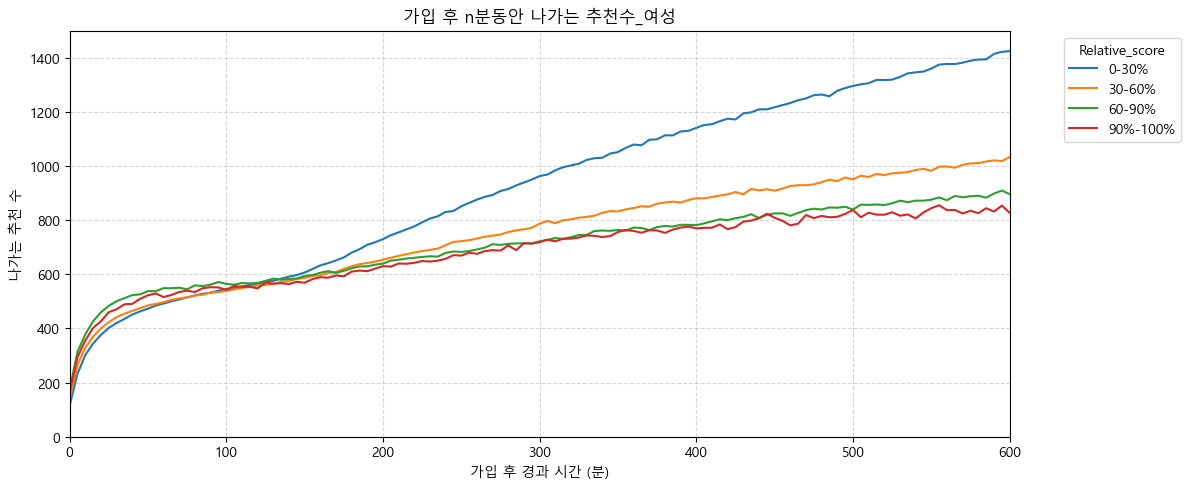

In [80]:
plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=df_plot, x='time', y='cumul_rcmd_users', hue='grade')

plt.title('가입 후 n분동안 나가는 추천수_여성')
plt.xlim(0,600); 
plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,1500); 
plt.ylabel('나가는 추천 수')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

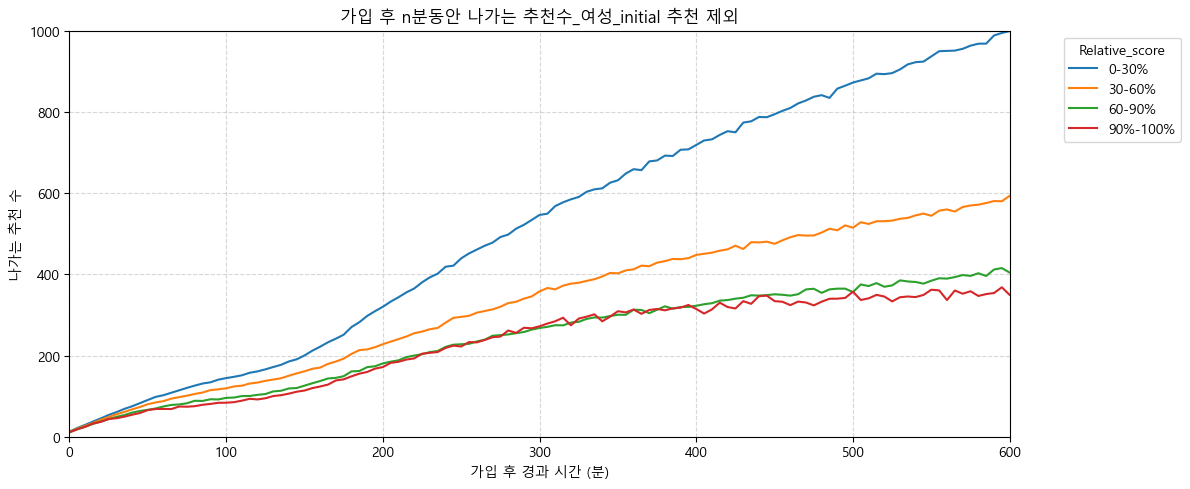

In [79]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_ini, x='time', y='cumul_rcmd_users', hue='grade')

plt.title('가입 후 n분동안 나가는 추천수_여성_initial 추천 제외')
plt.xlim(0,600); 
plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,1000); 
plt.ylabel('나가는 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


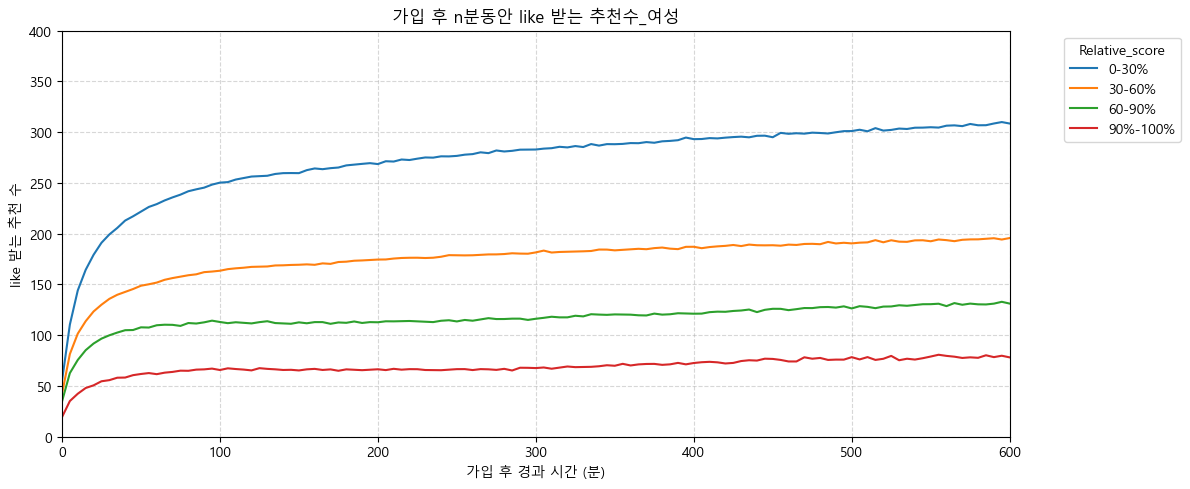

In [85]:

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot, x='time', y='cumul_rcmd_response_users', hue='grade')

plt.title('가입 후 n분동안 like 받는 추천수_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,400); plt.ylabel('like 받는 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [126]:
cols_to_fill = ['user2_relative_score', 'relative_score_grade', 'user2_gender', 'user2_location']

df_rr['grade'] = df_rr['user2_relative_score'] // 30 +1
df_rr['time'] = df_rr['min_rr'] *5
df_pivot_2way = df_rr.pivot_table(index=['grade','time'], values=['cumul_rcmd_2way_impression_users', 'cumul_rcmd_2way_response_users'], aggfunc='mean')
df_plot_2way = df_pivot_2way.reset_index()
df_plot_2way = df_plot_2way[df_plot_2way['grade'].isin(range(1, 11))]
df_plot_2way['grade'] = df_plot_2way['grade'].astype(int).astype(str)


df_rr_2['grade'] = df_rr_2['user2_relative_score'] // 30 +1
df_rr_2['time'] = df_rr_2['min_rr'] *5
df_pivot_2way_2 = df_rr_2.pivot_table(index=['grade','time'], values=['cumul_rcmd_2way_impression_users', 'cumul_rcmd_2way_response_users'], aggfunc='mean')
df_plot_2way_2 = df_pivot_2way_2.reset_index()
df_plot_2way_2 = df_plot_2way_2[df_plot_2way_2['grade'].isin(range(1, 11))]
df_plot_2way_2['grade'] = df_plot_2way_2['grade'].astype(int).astype(str)



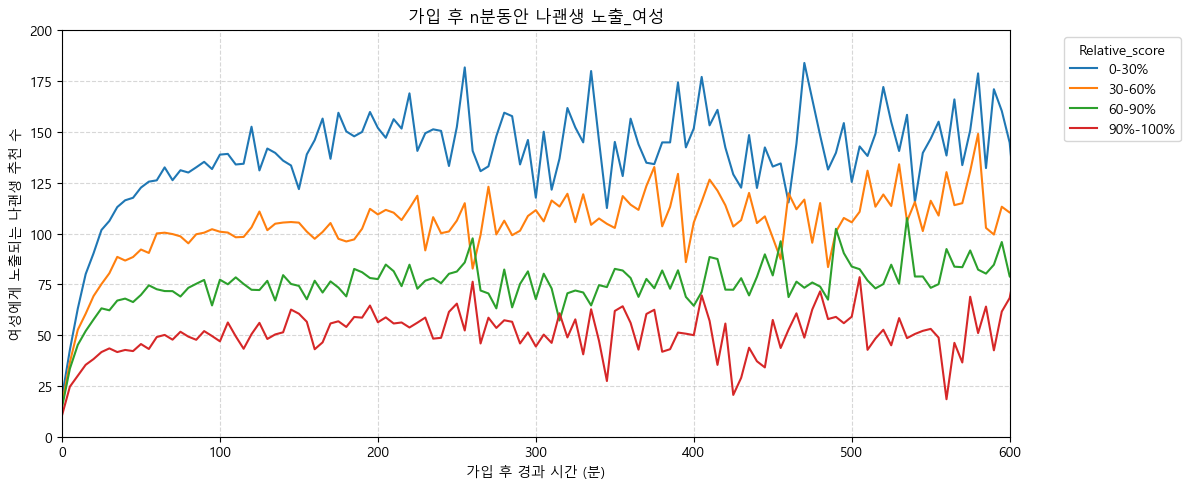

In [128]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_2way, x='time', y='cumul_rcmd_2way_impression_users', hue='grade')

plt.title('가입 후 n분동안 나괜생 노출_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,200); plt.ylabel('여성에게 노출되는 나괜생 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

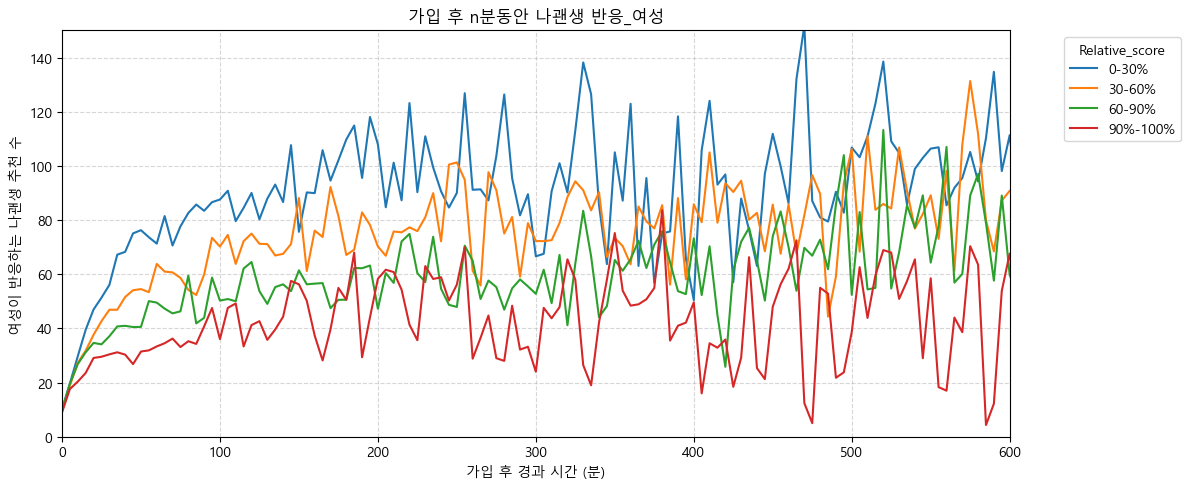

In [127]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_2way_2, x='time', y='cumul_rcmd_2way_response_users', hue='grade')

plt.title('가입 후 n분동안 나괜생 반응_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,150); plt.ylabel('여성이 반응하는 나괜생 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

,user2_id,min_rr,user2_id.1,user2_relative_score,relative_score_grade,user2_gender,date_ymd_kst,hour_kst,user2_location,min_rr.1,rcmd_users,rcmd_response_users,rcmd_2way_response_users,rcmd_2way_impression_users,rcmd_request_users,cumul_rcmd_users,cumul_rcmd_response_users,cumul_rcmd_request_users,cumul_rcmd_2way_impression_users,cumul_rcmd_2way_response_users,grade,time
0,4567577,0,NaN,16.708642,1.0,1.0,NaN,NaN,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,4567577,1,4567577.0,16.708642,1.0,1.0,2025-12-20,13.0,서울,1.0,14.0,14.0,5.0,14.0,0.0,14.0,14.0,0.0,14.0,5.0,1.0,5
2,4567577,2,NaN,16.708642,1.0,1.0,NaN,NaN,서울,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,0.0,14.0,5.0,NaN,10
3,4567577,3,NaN,16.708642,1.0,1.0,NaN,NaN,서울,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,0.0,14.0,5.0,NaN,15
4,4567577,4,4567577.0,16.708642,1.0,1.0,2025-12-20,13.0,서울,4.0,7.0,7.0,1.0,7.0,0.0,21.0,21.0,0.0,21.0,6.0,1.0,20
